In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import cv2
from keras.preprocessing.image import ImageDataGenerator
import scipy
import tensorflow as tf

In [2]:
classifier = Sequential()

classifier.add(
    Conv2D(32, (3,3), 
    input_shape = (64,64,3),
    activation = 'relu') #rectified linear activation function
)


classifier.add(
    MaxPooling2D(pool_size = (2,2))
)


classifier.add(
    Flatten()
)


classifier.add(
    Dense(units = 128,activation = 'relu'))

classifier.add(
    Dense(units = 1, activation = 'sigmoid'))

classifier.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/avish/Desktop/All/.sliit/SLIIT Y3S1/Design Project - I - EC3061/things needed in the final demo/data/cnn/train',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:/Users/avish/Desktop/All/.sliit/SLIIT Y3S1/Design Project - I - EC3061/things needed in the final demo/data/cnn/test',
                                           target_size = (64,64),
                                           batch_size = 32,
                                           class_mode = 'binary')


Found 5862 images belonging to 2 classes.
Found 322 images belonging to 2 classes.


In [4]:
history=classifier.fit_generator(training_set,
                        steps_per_epoch = 80,
                        epochs = 10,
                        validation_data = test_set,
                        validation_steps = 46)

Epoch 1/10


C:\Users\avish\AppData\Local\Temp\ipykernel_23916\3687748477.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=classifier.fit_generator(training_set,


80/80 [==============================] - 14s 173ms/step - loss: 0.1317 - accuracy: 0.9809 - val_loss: 23.5302 - val_accuracy: 0.0000e+00
Epoch 2/10
80/80 [==============================] - 11s 143ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 3/10
80/80 [==============================] - 11s 136ms/step - loss: 4.8405e-04 - accuracy: 1.0000
Epoch 4/10
80/80 [==============================] - 11s 138ms/step - loss: 4.5214e-04 - accuracy: 1.0000
Epoch 5/10
80/80 [==============================] - 11s 137ms/step - loss: 1.7428e-04 - accuracy: 1.0000
Epoch 6/10
80/80 [==============================] - 10s 129ms/step - loss: 9.4918e-05 - accuracy: 1.0000
Epoch 7/10
80/80 [==============================] - 11s 137ms/step - loss: 5.3527e-05 - accuracy: 1.0000
Epoch 8/10
80/80 [==============================] - 11s 131ms/step - loss: 4.7711e-05 - accuracy: 1.0000
Epoch 9/10
80/80 [==============================] - 10s 126ms/step - loss: 3.7206e-05 - accuracy: 1.0000
Epoch 10/10
80/80 [========

In [5]:
import numpy as np
from tensorflow.keras import utils
test_image = utils.load_img('C:/Users/avish/Desktop/All/.sliit/SLIIT Y3S1/Design Project - I - EC3061/things needed in the final demo/data/cnn/gor.png',target_size=(64,64))
test_image = utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result= classifier.predict(test_image)
training_set.class_indices

if result[0][0]==1:
    prediction = 'red'
else:
    prediction = 'green'
print(prediction)

import numpy as np
from keras.preprocessing import image
test_image = utils.load_img('C:/Users/avish/Desktop/All/.sliit/SLIIT Y3S1/Design Project - I - EC3061/things needed in the final demo/data/cnn/rog.png',target_size=(64,64))
test_image = utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result= classifier.predict(test_image)
training_set.class_indices

if result[0][0]==1:
    prediction = 'red'
else:
    prediction = 'green'
print(prediction)

1/1 [==============================] - 0s 90ms/step
red
1/1 [==============================] - 0s 31ms/step
green


In [6]:
train_loss, train_acc = classifier.evaluate_generator(training_set,steps=2)

test_loss,test_acc = classifier.evaluate_generator(test_set,steps=2)

print('Train: %.3f, Test: %.3f'% (train_acc,test_acc))

C:\Users\avish\AppData\Local\Temp\ipykernel_23916\3372335041.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss, train_acc = classifier.evaluate_generator(training_set,steps=2)
C:\Users\avish\AppData\Local\Temp\ipykernel_23916\3372335041.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss,test_acc = classifier.evaluate_generator(test_set,steps=2)


Train: 1.000, Test: 0.000


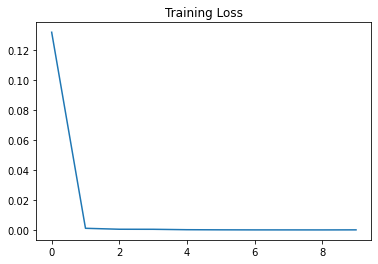

In [7]:
from matplotlib import pyplot as plt
plt.title("Training Loss")
plt.plot(history.history['loss'],label='Loss')
plt.show()

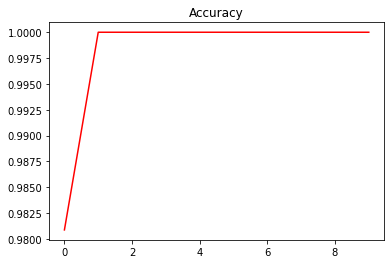

In [8]:
plt.title("Accuracy")
plt.plot(history.history['accuracy'],label='Accuracy', color="red")
plt.show()

In [9]:
print(history.history)

{'loss': [0.1317218542098999, 0.001117310137487948, 0.0004840480687562376, 0.0004521397640928626, 0.00017428392311558127, 9.491845412412658e-05, 5.3526680858340114e-05, 4.771067324327305e-05, 3.720606764545664e-05, 7.55492364987731e-05], 'accuracy': [0.9808593988418579, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [23.530223846435547], 'val_accuracy': [0.0]}
